<a href="https://colab.research.google.com/github/Advait177013/ML_CSE4020/blob/main/Lab_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#kmeans, knn, kmedoids
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y = True)
from sklearn import preprocessing 
scalerX = preprocessing.StandardScaler().fit(X)
X= scalerX.transform(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [55]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, random_state=0, n_init=100).fit(X_train)
kmeans.cluster_centers_
y_pred_kmeans = kmeans.predict(X_test)

In [56]:
y_pred_kmeans

array([0, 1, 2, 0, 1, 0, 2, 1, 1, 2, 1, 0, 2, 0, 1, 0, 1, 0, 2, 0, 2, 0,
       1, 2, 2, 1, 0, 2, 2, 2], dtype=int32)

In [11]:
y_test

array([1, 1, 0, 1, 2, 1, 0, 2, 2, 0, 2, 1, 0, 1, 2, 1, 2, 2, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0])

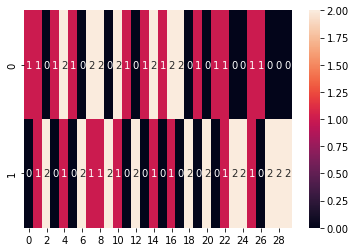

In [57]:
import seaborn as sb
y_checker = np.vstack((y_test, y_pred_kmeans))
checker = sb.heatmap(y_checker, annot=True)

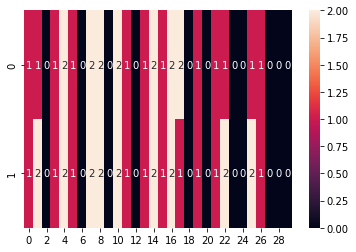

In [61]:
#convert 2 in y_pred to 0 by y_test
#convert 0 in y_pred to 1 by y_test
#convert 1 in y_pred to 2 by y_test
#below code cycles the values
y_pred_kmeans[y_pred_kmeans > 1] = -5
y_pred_kmeans[y_pred_kmeans > 0] = -2
y_pred_kmeans[y_pred_kmeans > -1] = 1
y_pred_kmeans[y_pred_kmeans < -4] = 0
y_pred_kmeans[y_pred_kmeans < -1] = 2
#y_pred
y_checker = np.vstack((y_test, y_pred_kmeans))
checker = sb.heatmap(y_checker, annot=True)

In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_kmeans)

0.8666666666666667

In [44]:
from sklearn.neighbors import KNeighborsClassifier
irisclassifier = KNeighborsClassifier(n_neighbors=20)
irisclassifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [46]:
y_pred_knn = irisclassifier.predict(X_test)
accuracy_score(y_test, y_pred_knn)

1.0

In [50]:
%pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters = 3, random_state=0)
kmedoids.fit(X_train)
y_pred_kmedoid = kmedoids.predict(X_test)
accuracy_score(y_test, y_pred_kmedoid)


0.9